<a href="https://colab.research.google.com/github/OlegSV117/project/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Urine_Basketball_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Подключение библиотек и скриптов**

In [ ]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from sklearn.linear_model import LinearRegression

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
matplotlib.rcParams.update({'font.size': 14})

## Формирования дата-фрейма

**Пути к директориям и файлам**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATASET_PATH = '/content/drive/MyDrive/Colab Notebooks/Urine_Basketball.csv'




### Загрузка данных

In [ ]:
# считываем  датасет
Urine_Basketball_df = pd.read_csv(DATASET_PATH, delimiter = ";")

Urine_Basketball_df

,Ф.И.О.,Креатинин,Альбумин,Цвет,Относительная плотность,pH,Белок,Уробилиноген,Лейкоциты,Эритроциты
0,Вецлер Генрих Олегович,6960.0,3.0,0.0,1013.0,6.5,0.0,0.0,0.0,0.0
1,Будкин Владимир Андреевич,24507.0,33.2,2.0,1028.0,7.0,0.2,34.0,3.0,2.0
2,Осипов Ярослав Игоревич,22986.0,9.4,1.0,1029.0,5.5,0.0,34.0,0.0,0.0
3,Черкасов Виктор Борисович,15272.0,11.4,1.0,1027.0,5.0,0.0,0.0,0.0,1.0
4,Вилковиский Юрий Федорович,11187.0,3.0,0.0,1020.0,5.5,0.0,0.0,0.0,0.0
5,Бурачков Вячеслав Александрович,16610.0,8.6,1.0,1028.0,5.5,0.0,0.0,1.0,1.0
6,Кузьмин Артем Антонович,15813.0,3.0,1.0,1021.0,6.0,0.0,0.0,0.0,0.0
7,Тимофеев Константин Вячеславович,10286.0,3.0,0.0,1016.0,6.5,0.0,0.0,0.0,0.0
8,Гизатуллин Василий Алексеевич,22535.0,19.9,1.0,1033.0,6.0,0.0,34.0,0.0,0.0
9,Степанов Илья Александрович,17598.0,7.9,1.0,1029.0,6.0,0.0,0.0,3.0,0.0


In [ ]:
Urine_Basketball_df['Альбумин/Креатинин'] = Urine_Basketball_df['Альбумин']/Urine_Basketball_df['Креатинин']*10000

Urine_Basketball_df

,Ф.И.О.,Креатинин,Альбумин,Цвет,Относительная плотность,pH,Белок,Уробилиноген,Лейкоциты,Эритроциты,Альбумин/Креатинин
0,Вецлер Генрих Олегович,6960.0,3.0,0.0,1013.0,6.5,0.0,0.0,0.0,0.0,4.310345
1,Будкин Владимир Андреевич,24507.0,33.2,2.0,1028.0,7.0,0.2,34.0,3.0,2.0,13.547150
2,Осипов Ярослав Игоревич,22986.0,9.4,1.0,1029.0,5.5,0.0,34.0,0.0,0.0,4.089446
3,Черкасов Виктор Борисович,15272.0,11.4,1.0,1027.0,5.0,0.0,0.0,0.0,1.0,7.464641
4,Вилковиский Юрий Федорович,11187.0,3.0,0.0,1020.0,5.5,0.0,0.0,0.0,0.0,2.681684
5,Бурачков Вячеслав Александрович,16610.0,8.6,1.0,1028.0,5.5,0.0,0.0,1.0,1.0,5.177604
6,Кузьмин Артем Антонович,15813.0,3.0,1.0,1021.0,6.0,0.0,0.0,0.0,0.0,1.897173
7,Тимофеев Константин Вячеславович,10286.0,3.0,0.0,1016.0,6.5,0.0,0.0,0.0,0.0,2.916586
8,Гизатуллин Василий Алексеевич,22535.0,19.9,1.0,1033.0,6.0,0.0,34.0,0.0,0.0,8.830708
9,Степанов Илья Александрович,17598.0,7.9,1.0,1029.0,6.0,0.0,0.0,3.0,0.0,4.489146


### Обзор данных, EDA

In [ ]:
Urine_Basketball_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ф.И.О.                   11 non-null     object 
 1   Креатинин                11 non-null     float64
 2   Альбумин                 11 non-null     float64
 3   Цвет                     11 non-null     float64
 4   Относительная плотность  11 non-null     float64
 5   pH                       11 non-null     float64
 6   Белок                    11 non-null     float64
 7   Уробилиноген             11 non-null     float64
 8   Лейкоциты                11 non-null     float64
 9   Эритроциты               11 non-null     float64
 10  Альбумин/Креатинин       11 non-null     float64
dtypes: float64(10), object(1)
memory usage: 1.1+ KB


### Обзор типов переменных

In [ ]:
Urine_Basketball_df = Urine_Basketball_df.astype({'Цвет':'int','Лейкоциты':'int','Эритроциты':'int'},errors='ignore')

In [ ]:
Urine_Basketball_df.dtypes

Ф.И.О.                      object
Креатинин                  float64
Альбумин                   float64
Цвет                         int64
Относительная плотность    float64
pH                         float64
Белок                      float64
Уробилиноген               float64
Лейкоциты                    int64
Эритроциты                   int64
Альбумин/Креатинин         float64
dtype: object

In [ ]:
Urine_Basketball_df.dtypes.value_counts()

float64    7
int64      3
object     1
dtype: int64

## Вычисление основных статистических показателей 

In [ ]:
Urine_Basketball_df.describe().round(2)

,Креатинин,Альбумин,Цвет,Относительная плотность,pH,Белок,Уробилиноген,Лейкоциты,Эритроциты,Альбумин/Креатинин
count,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00
mean,16825.64,10.39,0.91,1024.73,5.91,0.02,9.27,0.64,0.36,5.54
std,5707.85,9.18,0.70,6.26,0.58,0.06,15.88,1.21,0.67,3.34
min,6960.00,3.00,0.00,1013.00,5.00,0.00,0.00,0.00,0.00,1.90
25%,13229.50,3.00,0.50,1020.50,5.50,0.00,0.00,0.00,0.00,3.50
50%,16610.00,8.60,1.00,1028.00,6.00,0.00,0.00,0.00,0.00,4.49
75%,21931.50,11.65,1.00,1028.50,6.25,0.00,17.00,0.50,0.50,6.52
max,24507.00,33.20,2.00,1033.00,7.00,0.20,34.00,3.00,2.00,13.55


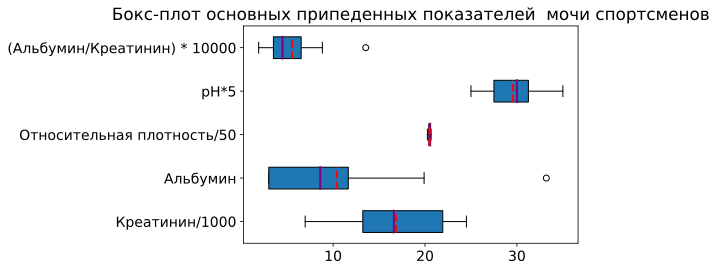

In [ ]:
#@title
fig, ax = plt.subplots()
ax.boxplot((Urine_Basketball_df["Креатинин"]/1000,Urine_Basketball_df["Альбумин"],Urine_Basketball_df["Относительная плотность"]/50,
          Urine_Basketball_df["pH"]*5, Urine_Basketball_df['Альбумин/Креатинин']), vert=False, showmeans=True, meanline=True,
          labels=('Креатинин/1000','Альбумин','Относительная плотность/50', 'pH*5','(Альбумин/Креатинин) * 10000'), patch_artist=True,
          medianprops={'linewidth': 2, 'color': 'purple'},
          meanprops={'linewidth': 2, 'color': 'red'})
plt.title('Бокс-плот основных припеденных показателей  мочи спортсменов')
plt.show()

Среднее значение — это красная пунктирная линия. Медиана — это фиолетовая линия. Первый квартиль — левый край синего прямоугольника. Третий квартиль — это правый край синего прямоугольника. Межквартильный диапазон — это длина синего прямоугольника. Диапазон — всё слева направо. Выбросы — точки слева и справа.

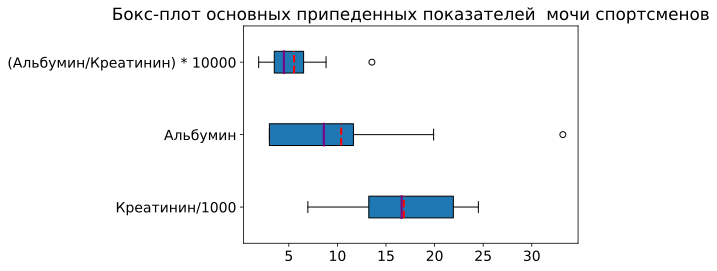

In [ ]:
fig, ax = plt.subplots()
ax.boxplot((Urine_Basketball_df["Креатинин"]/1000,Urine_Basketball_df["Альбумин"], Urine_Basketball_df['Альбумин/Креатинин']),
           vert=False, showmeans=True, meanline=True,
           labels=('Креатинин/1000','Альбумин', '(Альбумин/Креатинин) * 10000'), patch_artist=True,
           medianprops={'linewidth': 2, 'color': 'purple'},
           meanprops={'linewidth': 2, 'color': 'red'})
plt.title('Бокс-плот основных припеденных показателей  мочи спортсменов')
plt.show()

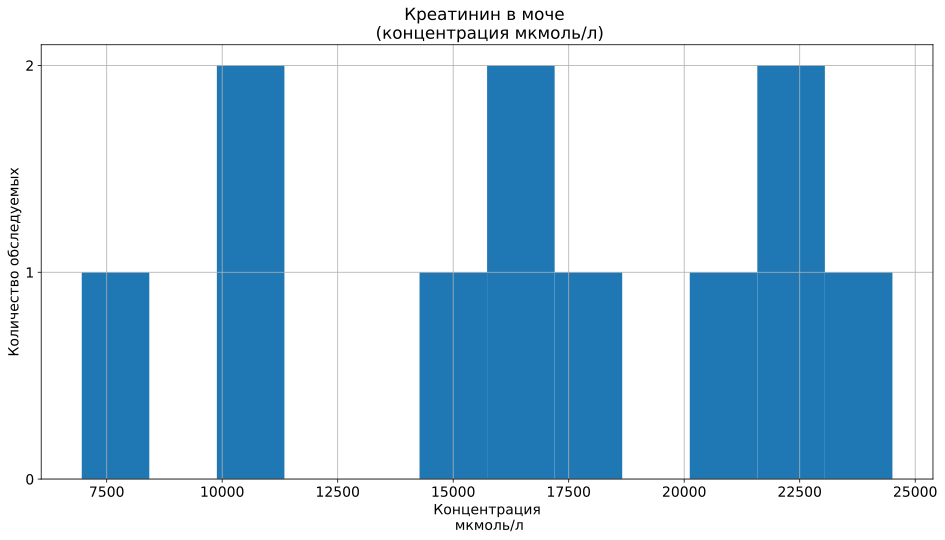

In [ ]:
plt.figure(figsize = (16, 8))

Urine_Basketball_df['Креатинин'].hist(bins=12)
plt.ylabel('Количество обследуемых')
plt.xlabel('Концентрация\n мкмоль/л')
plt.yticks(np.arange(0,3,1))
plt.title('Креатинин в моче \n (концентрация мкмоль/л)')
plt.show()

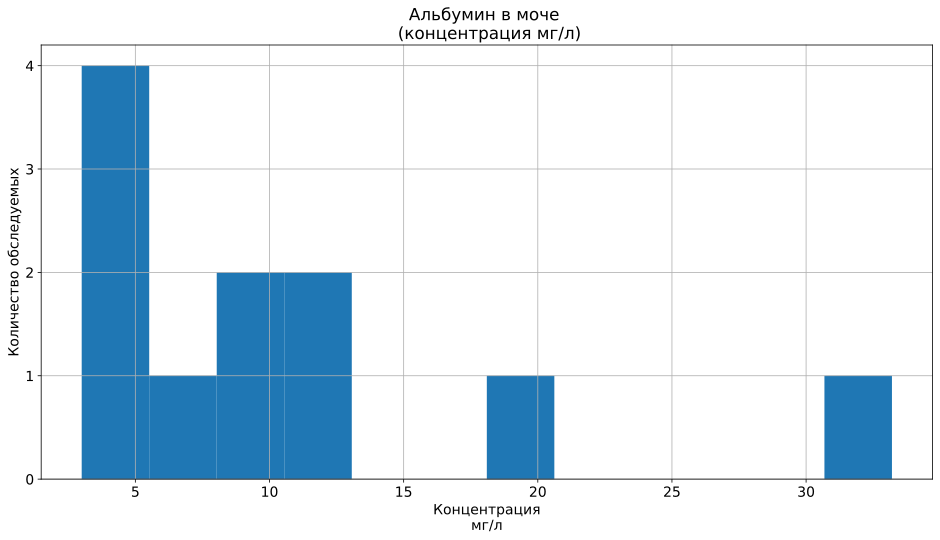

In [ ]:
plt.figure(figsize = (16, 8))

Urine_Basketball_df['Альбумин'].hist(bins=12)
plt.ylabel('Количество обследуемых')
plt.xlabel('Концентрация\nмг/л')
plt.yticks(np.arange(0,5,1))
plt.title('Альбумин в моче \n (концентрация мг/л)')
plt.show()

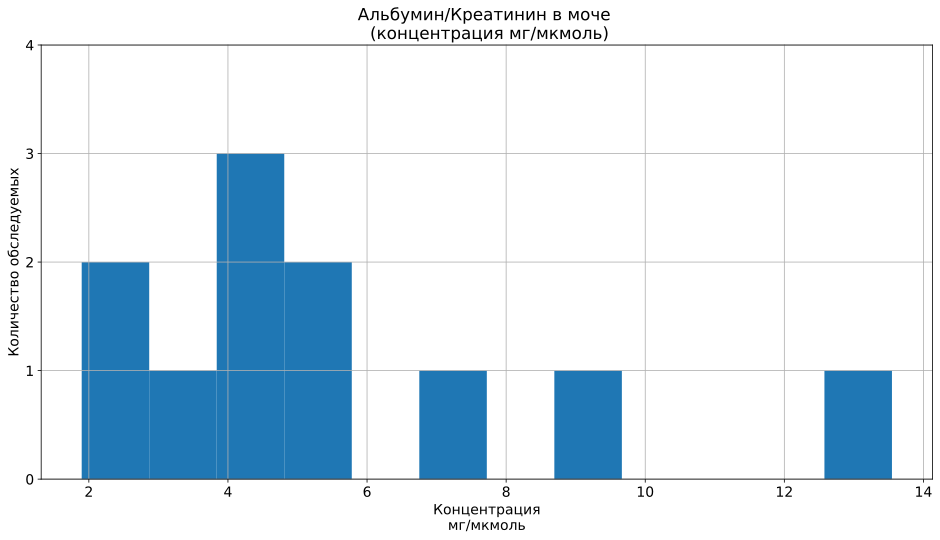

In [ ]:
plt.figure(figsize = (16, 8))

Urine_Basketball_df['Альбумин/Креатинин'].hist(bins=12)
plt.ylabel('Количество обследуемых')
plt.xlabel('Концентрация\nмг/мкмоль')
plt.yticks(np.arange(0,5,1))
plt.title('Альбумин/Креатинин в моче \n (концентрация мг/мкмоль)')
plt.show()

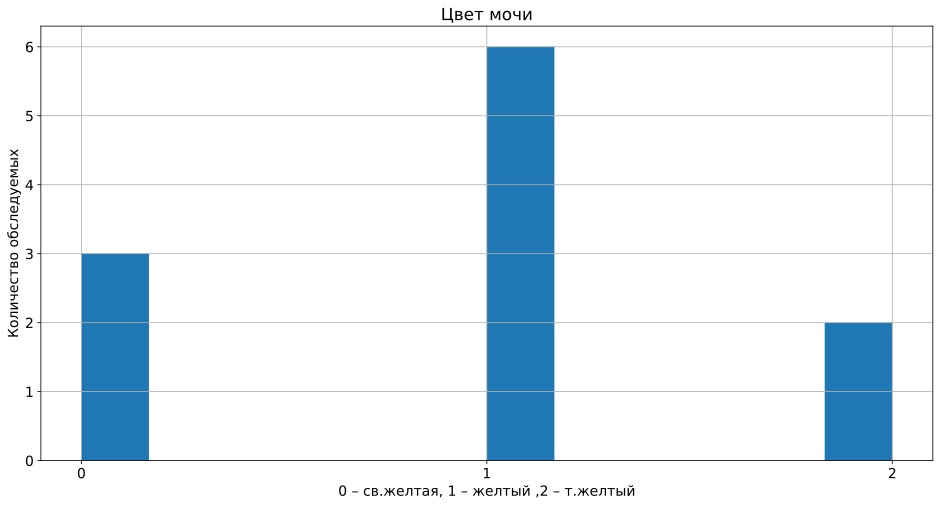

In [ ]:
plt.figure(figsize = (16, 8))

Urine_Basketball_df['Цвет'].hist(bins=12)
plt.ylabel('Количество обследуемых')
plt.xlabel('0 – св.желтая, 1 – желтый ,2 – т.желтый')

plt.xticks(np.arange(0,3,1))
plt.yticks(np.arange(0,7,1))

plt.title('Цвет мочи')
plt.show()

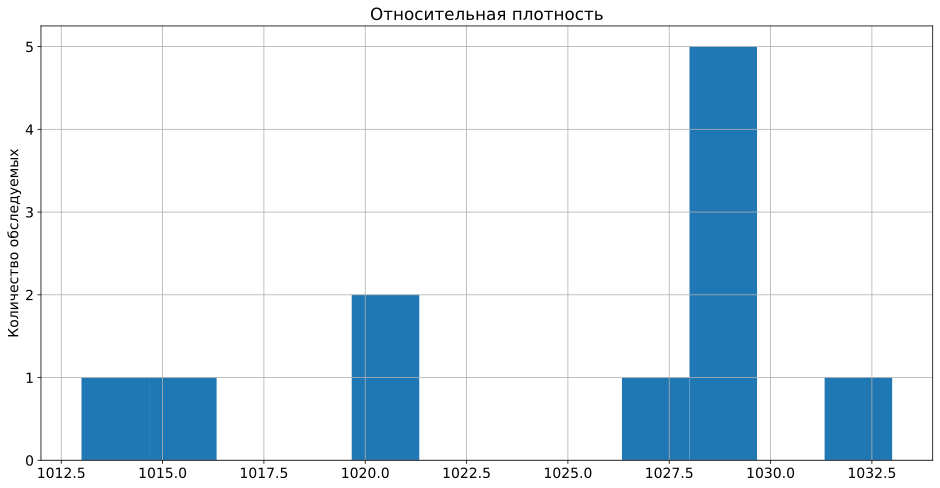

In [ ]:
plt.figure(figsize = (16, 8))

Urine_Basketball_df['Относительная плотность'].hist(bins=12)
plt.ylabel('Количество обследуемых')

plt.yticks(np.arange(0,6,1))

plt.title('Относительная плотность')
plt.show()

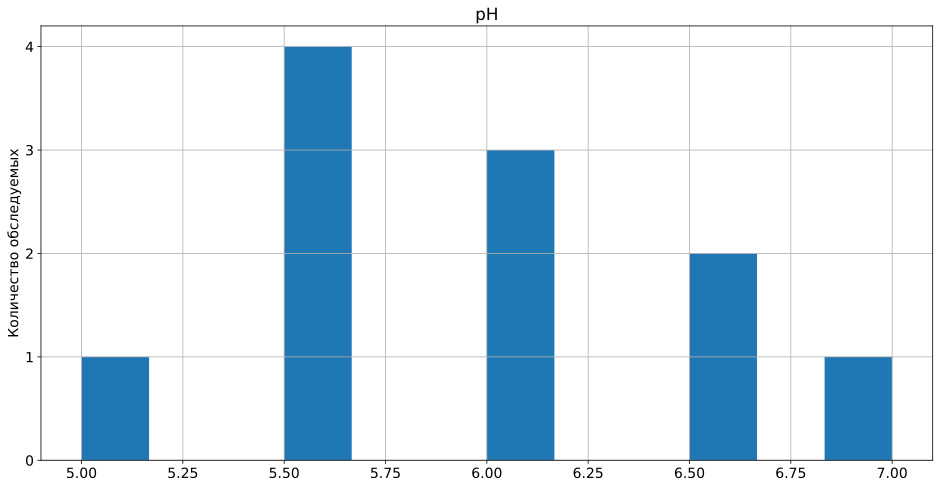

In [ ]:
plt.figure(figsize = (16, 8))

Urine_Basketball_df['pH'].hist(bins=12)
plt.ylabel('Количество обследуемых')

plt.yticks(np.arange(0,5,1))

plt.title('pH')
plt.show()

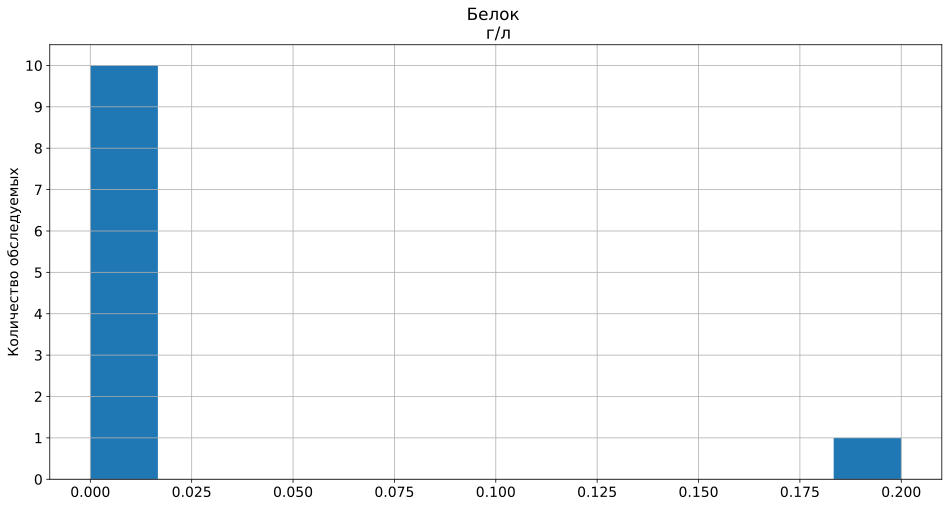

In [ ]:
plt.figure(figsize = (16, 8))

Urine_Basketball_df['Белок'].hist(bins=12)
plt.ylabel('Количество обследуемых')

plt.yticks(np.arange(0,11,1))

plt.title('Белок \n г/л')
plt.show()

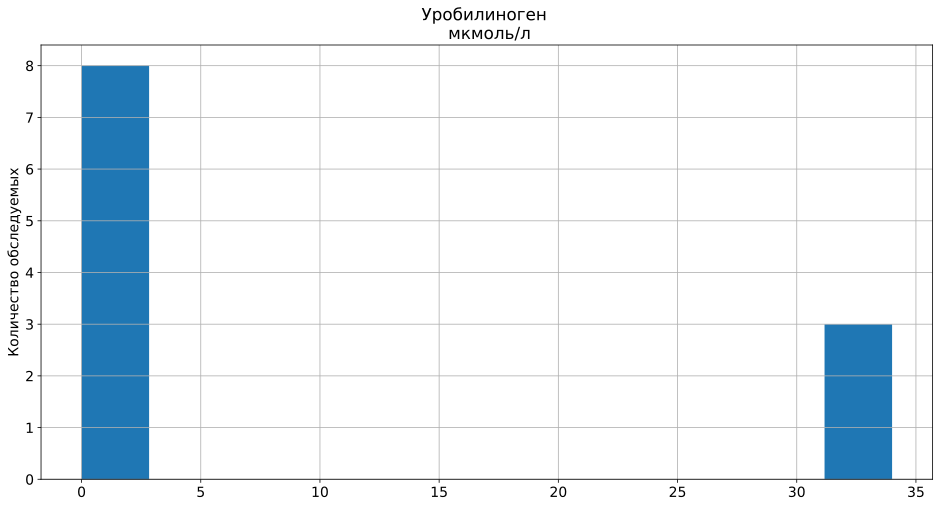

In [ ]:
plt.figure(figsize = (16, 8))

Urine_Basketball_df['Уробилиноген'].hist(bins=12)
plt.ylabel('Количество обследуемых')

plt.yticks(np.arange(0,9,1))

plt.title('Уробилиноген \n мкмоль/л')
plt.show()

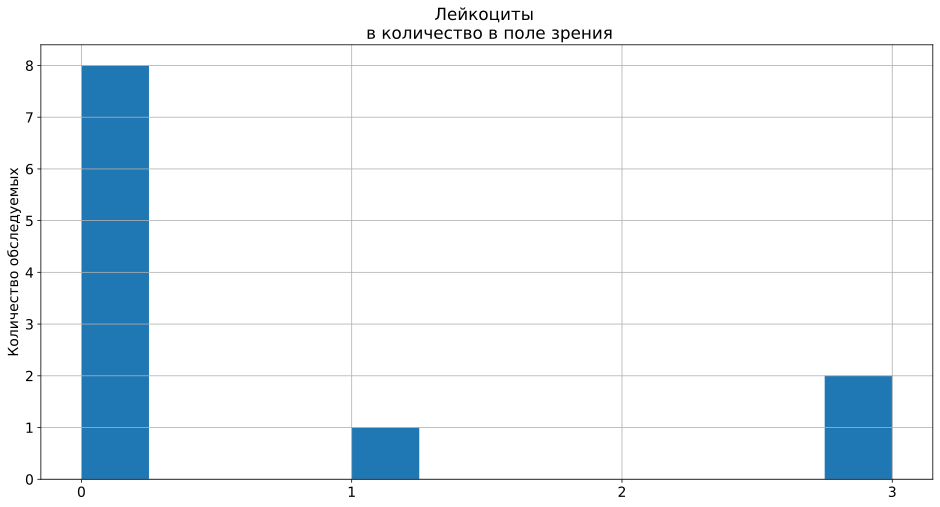

In [ ]:
plt.figure(figsize = (16, 8))

Urine_Basketball_df['Лейкоциты'].hist(bins=12)
plt.ylabel('Количество обследуемых')

plt.xticks(np.arange(0,4,1))
plt.yticks(np.arange(0,9,1))

plt.title('Лейкоциты \n в количество в поле зрения')
plt.show()

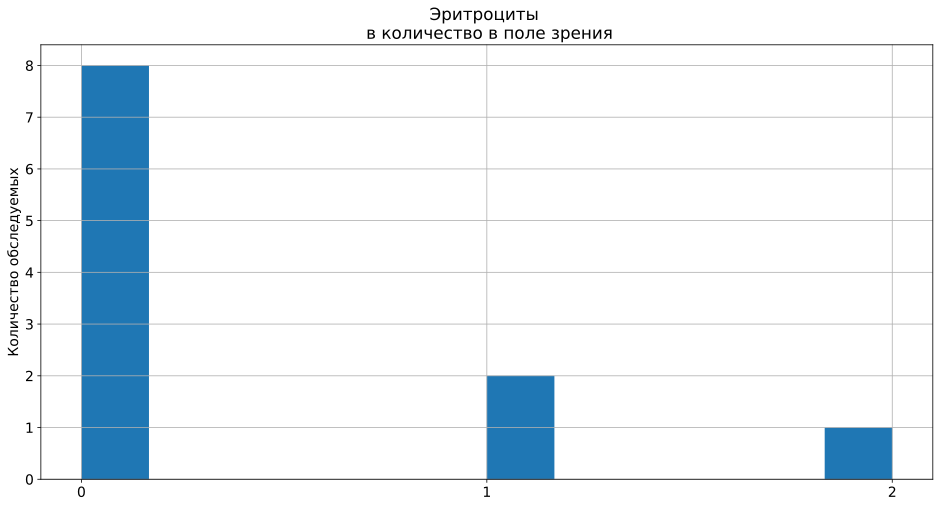

In [ ]:
plt.figure(figsize = (16, 8))

Urine_Basketball_df['Эритроциты'].hist(bins=12)
plt.ylabel('Количество обследуемых')

plt.xticks(np.arange(0,3,1))
plt.yticks(np.arange(0,9,1))

plt.title('Эритроциты \n в количество в поле зрения')
plt.show()

In [ ]:
# Числовые признаки (переменные)
numerical_features = Urine_Basketball_df.select_dtypes(include = [np.number])
print (f"count of numerical_features {numerical_features.shape[1]}")

numerical_features.columns

count of numerical_features 10


Index(['Креатинин', 'Альбумин', 'Цвет', 'Относительная плотность', 'pH',
       'Белок', 'Уробилиноген', 'Лейкоциты', 'Эритроциты',
       'Альбумин/Креатинин'],
      dtype='object')

In [ ]:
numerical_features.head(n=2)

,Креатинин,Альбумин,Цвет,Относительная плотность,pH,Белок,Уробилиноген,Лейкоциты,Эритроциты,Альбумин/Креатинин
0,6960.0,3.0,0,1013.0,6.5,0.0,0.0,0,0,4.310345
1,24507.0,33.2,2,1028.0,7.0,0.2,34.0,3,2,13.547150


In [ ]:
# дискретные признаки
dicrete_feature = [
                   feature for feature in numerical_features
                   if len(Urine_Basketball_df[feature].unique())<5]
print (f"Discrete Variables Count: {len(dicrete_feature)}")

Discrete Variables Count: 5


In [ ]:
Urine_Basketball_df[dicrete_feature].head(2)

,Цвет,Белок,Уробилиноген,Лейкоциты,Эритроциты
0,0,0.0,0.0,0,0
1,2,0.2,34.0,3,2


In [ ]:
# "непрерывные" признаки
continues_feature = [
                   feature for feature in numerical_features
                   if feature not in dicrete_feature]
                   
print (f"Continues Variables Count: {len(continues_feature )}")

Continues Variables Count: 5


##Вычисление кореляционной матрицы

In [ ]:
Urine_Basketball_df.corr().round(2)

,Креатинин,Альбумин,Цвет,Относительная плотность,pH,Белок,Уробилиноген,Лейкоциты,Эритроциты,Альбумин/Креатинин
Креатинин,1.00,0.76,0.86,0.88,-0.04,0.45,0.73,0.37,0.35,0.61
Альбумин,0.76,1.00,0.72,0.61,0.35,0.82,0.73,0.53,0.72,0.97
Цвет,0.86,0.72,1.00,0.72,-0.02,0.52,0.39,0.43,0.50,0.63
Относительная плотность,0.88,0.61,0.72,1.00,-0.34,0.17,0.54,0.34,0.29,0.53
pH,-0.04,0.35,-0.02,-0.34,1.00,0.62,0.28,0.45,0.22,0.33
Белок,0.45,0.82,0.52,0.17,0.62,1.00,0.52,0.65,0.80,0.79
Уробилиноген,0.73,0.73,0.39,0.54,0.28,0.52,1.00,0.19,0.29,0.63
Лейкоциты,0.37,0.53,0.43,0.34,0.45,0.65,0.19,1.00,0.55,0.51
Эритроциты,0.35,0.72,0.50,0.29,0.22,0.80,0.29,0.55,1.00,0.78
Альбумин/Креатинин,0.61,0.97,0.63,0.53,0.33,0.79,0.63,0.51,0.78,1.00


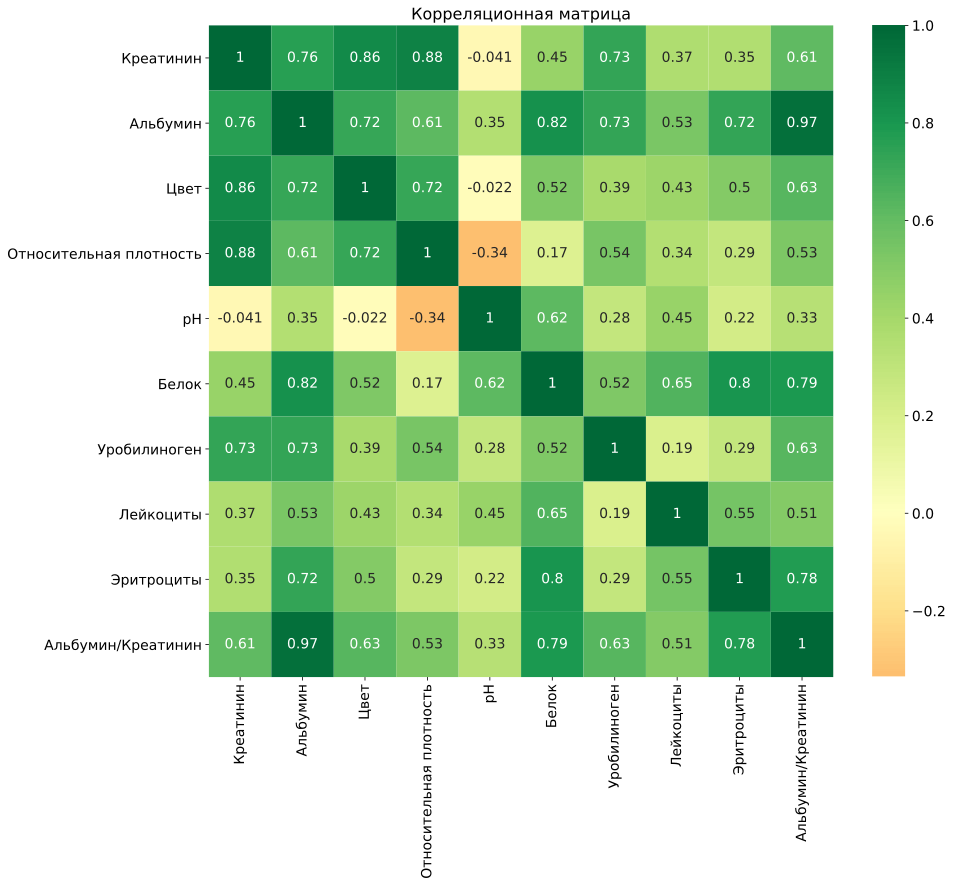

In [ ]:
# корреляционная матрица численных переменных 
fig, axes = plt.subplots(figsize = (14,12))
plt.title("Корреляционная матрица", y=1, size=16)
sns.heatmap(Urine_Basketball_df.corr(), xticklabels=Urine_Basketball_df.corr().columns, yticklabels=Urine_Basketball_df.corr().columns, cmap='RdYlGn', center=0, annot=True)

